@Author: Sushant Das
@Date: 09-10-2024
@Last Modified by: Sushant Das
@Last Modified time: 09-10-2024
@Title: Python program to predict apparent temperature for given humidity using Simple Linear Regression

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#### Loading the dataset

In [23]:
weather_df = pd.read_csv("datasets/weatherHistory.csv")
weather_df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


#### Describe dataset

In [24]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


#### Checking for null values

In [25]:
print(weather_df.isnull().sum())

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64


#### Checking percentage of null values

In [26]:
print(weather_df.isnull().sum(axis=0) * 100/len(weather_df))

Formatted Date              0.000000
Summary                     0.000000
Precip Type                 0.536012
Temperature (C)             0.000000
Apparent Temperature (C)    0.000000
Humidity                    0.000000
Wind Speed (km/h)           0.000000
Wind Bearing (degrees)      0.000000
Visibility (km)             0.000000
Loud Cover                  0.000000
Pressure (millibars)        0.000000
Daily Summary               0.000000
dtype: float64


#### Treating null values

In [27]:
weather_df = weather_df[weather_df['Precip Type'].notna()]

#### Checking for data outliers

<Axes: >

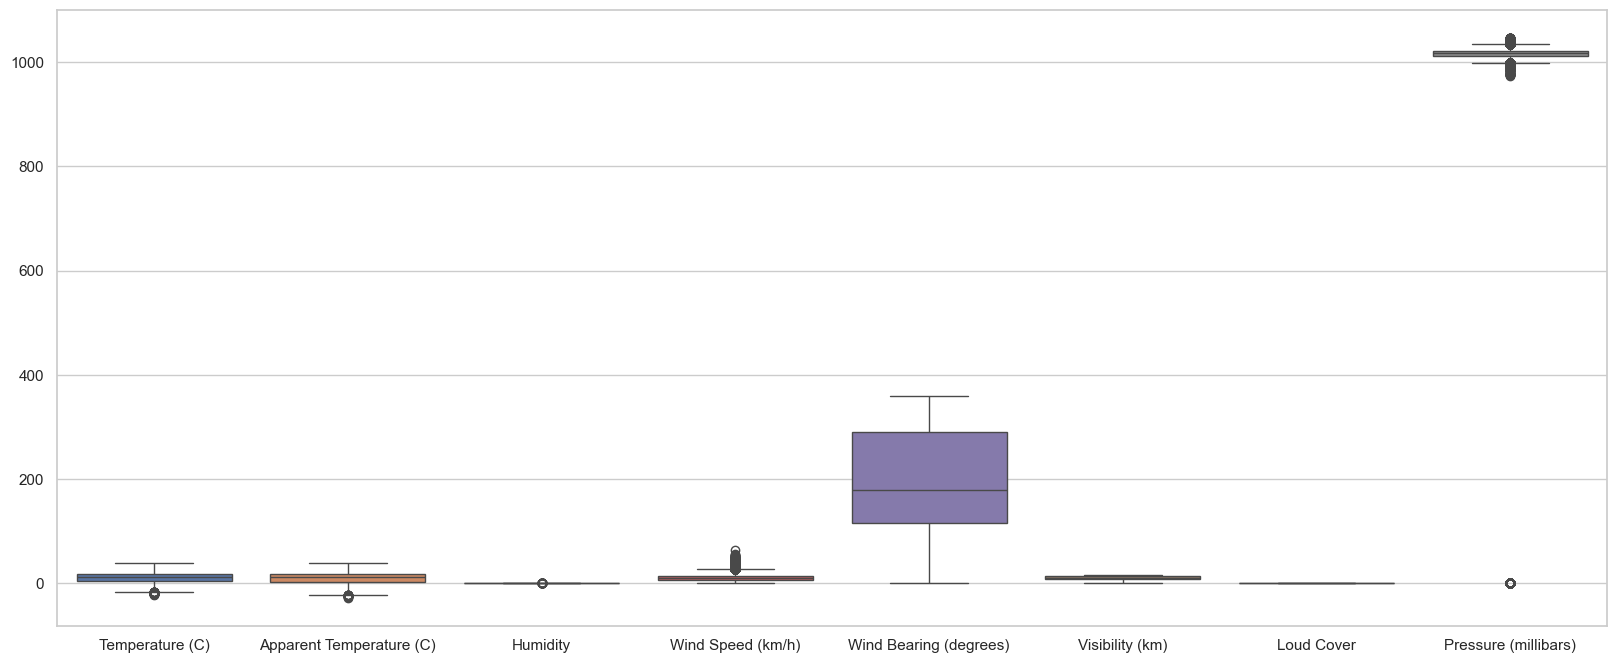

In [28]:
sns.set(rc={'figure.figsize':(20,8)}, style='whitegrid')
sns.boxplot(data=weather_df)

<Axes: ylabel='Humidity'>

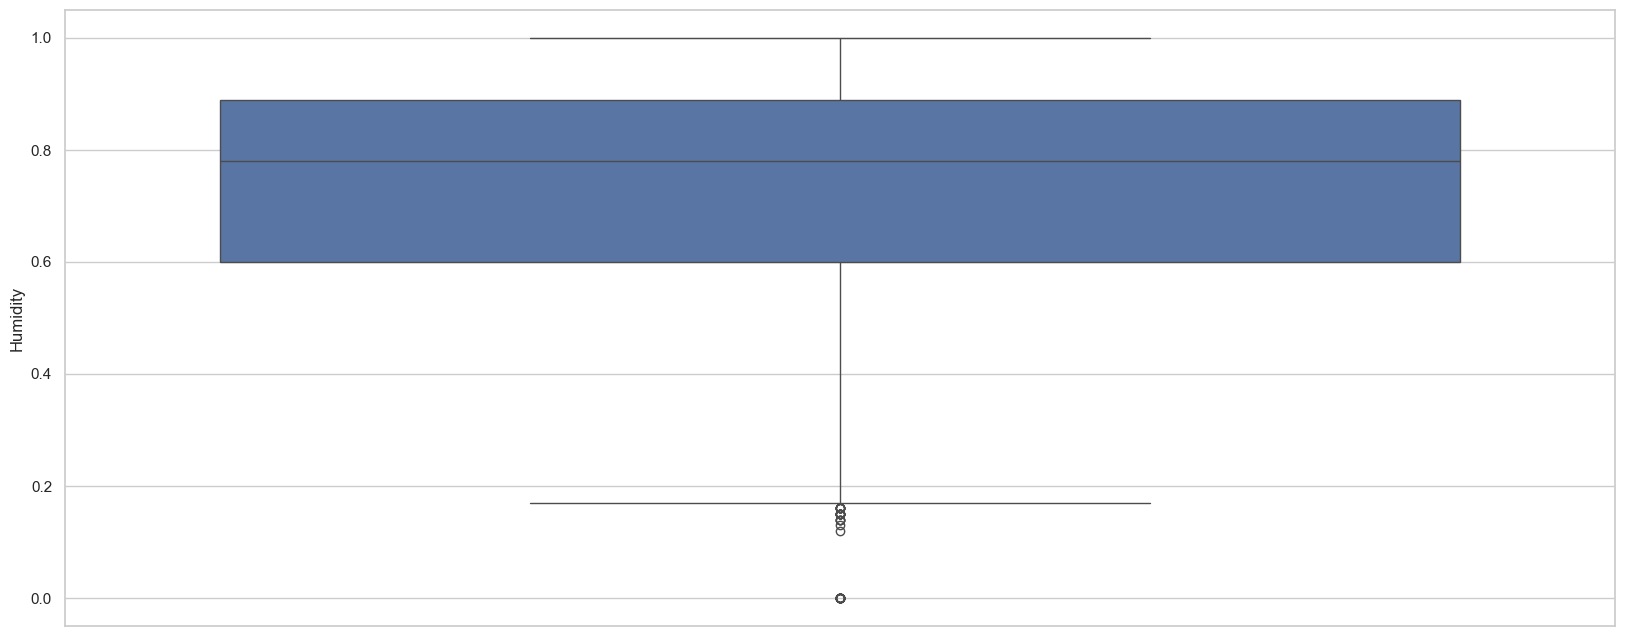

In [29]:
sns.boxplot(data=weather_df['Humidity'])

<Axes: ylabel='Apparent Temperature (C)'>

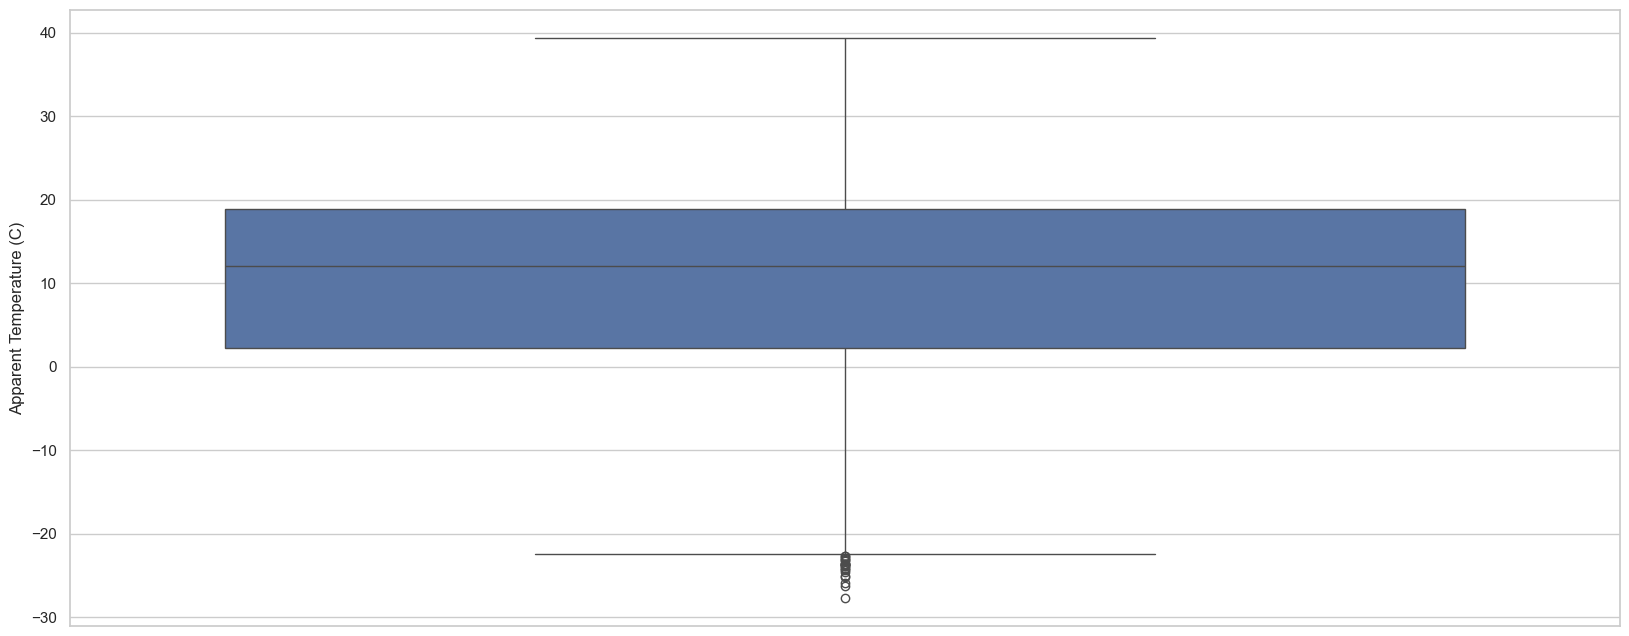

In [30]:
sns.boxplot(data=weather_df['Apparent Temperature (C)'])

#### Dropping data outlier in Humidity column 

In [31]:
weather_df = weather_df[weather_df['Humidity'] != 0.0]
print(weather_df.shape)

(95914, 12)


In [32]:
weather_df.fillna(weather_df['Precip Type'].mode()[0], inplace=True)
print(weather_df.isnull().sum())

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64


#### Splitting train and test dataset

In [13]:
x = weather_df[['Humidity']]
y = weather_df[['Temperature (C)']]

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=101)

In [15]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

#### Train the model

In [16]:
model = linear_model.LinearRegression()
model.fit(x_train_scaled, y_train)
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_}")

Intercept: [11.95371129]
Coefficient: [[-6.06873672]]


In [17]:
coeff_df = pd.DataFrame(model.coef_,x.columns, columns=["coefficient"])
coeff_df

,coefficient
Humidity,-6.068737


#### Test the model

In [18]:
y_pred = model.predict(x_test_scaled)

#### Plotting the regression line

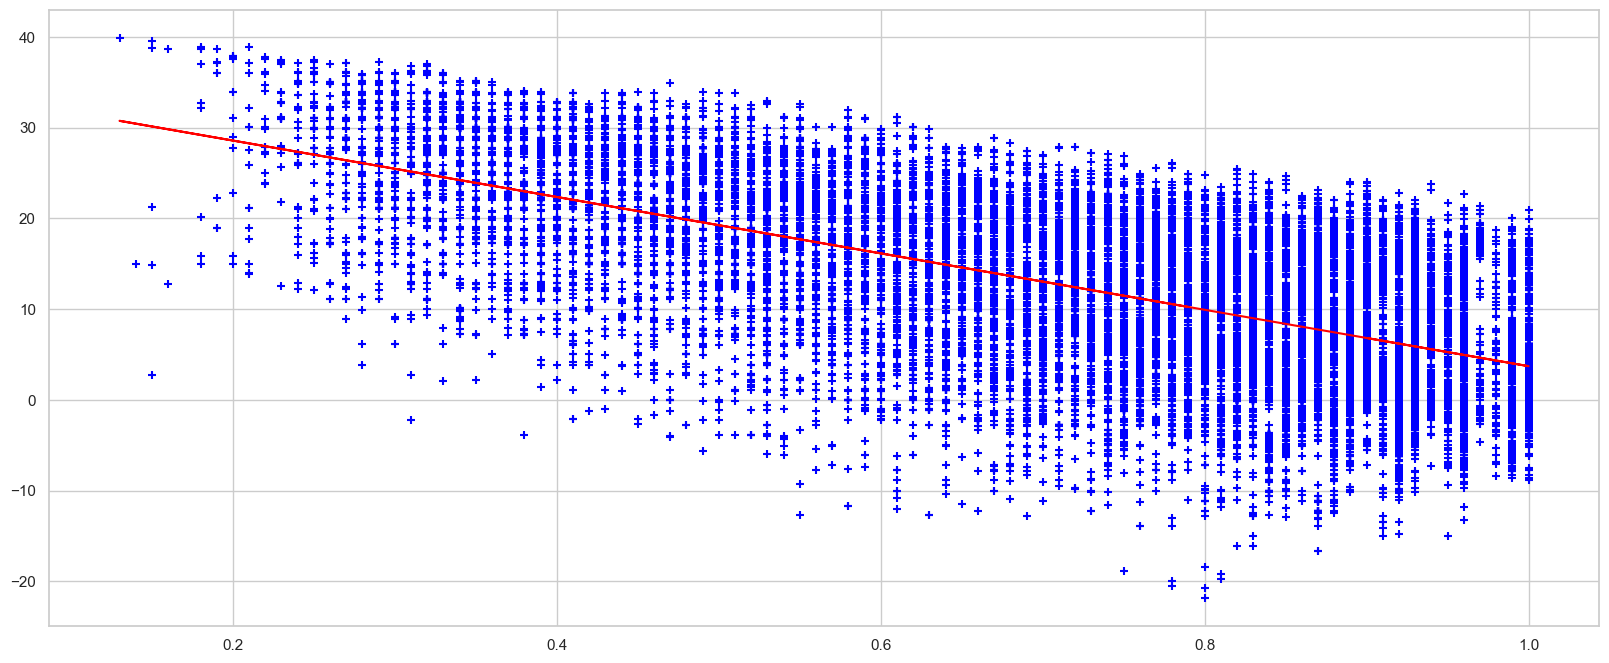

In [19]:
plt.scatter(x_test, y_test, color='blue', label='Actual', marker='+')
plt.plot(x_test, y_pred, color='red', label='Regression Line')

#### Checking the model performance

In [20]:
r2_score(y_test, y_pred)

0.4083810875710633

In [21]:
mean_squared_error(y_pred, y_test)

54.16419035489673